## KNN Approach



### Setup

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import tensorflow as tf


from pyMLaux import plot_history, evaluate_classification_result

In [17]:
## adapt this directory to your needs
# TODO-> change path to be dynamic 
base_dir = '/home/bac/activity_prediction/implementation/'
data_dir = base_dir + 'data/'

### load & prepare dataset

the following code needs to be adapted for each protein-ligand complex individually

In [18]:
nn_data_raw = pd.read_csv(data_dir+"DPP4/DPP4.csv")

nn_data_raw

,INDEX,NAME,Pi-Cation_Interaction:HIS740A,Halogen_Bond:ASP709A,Halogen_Bond:VAL546A,Hydrogen_Bond:GLY741A,Water_Bridge:GLU204A,Water_Bridge:ARG125A,Halogen_Bond:ARG358A,Hydrophobic_Interaction:ALA743A,...,Hydrogen_Bond:ARG669A,Hydrogen_Bond:ASN710A,Hydrogen_Bond:GLU204A,Hydrophobic_Interaction:ARG125A,Halogen_Bond:SER630A,Water_Bridge:ASP739A,Salt_Bridge:ARG358A,Water_Bridge:GLU205A,Hydrophobic_Interaction:ASP739A,LABEL
0,1,CHEMBL386369|actives_final|sdf|444,0,0,0,0,0,0,0,0,...,2,1,0,0,0,0,1,0,0,active
1,2,ZINC38935877|decoys_final|sdf|121,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,inactive
2,3,ZINC63159848|decoys_final|sdf|138,0,0,0,0,0,3,0,0,...,0,1,0,0,0,0,0,0,0,inactive
3,4,ZINC23079060|decoys_final|sdf|264,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,inactive
4,5,CHEMBL290337|actives_final|sdf|331,0,0,0,0,0,3,0,0,...,1,1,0,0,0,0,0,0,0,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1690,1691,ZINC49729498|decoys_final|sdf|645,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1691,1692,ZINC43263233|decoys_final|sdf|584,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1692,1693,ZINC36962060|decoys_final|sdf|615,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,inactive
1693,1694,CHEMBL564854|actives_final|sdf|55,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,active


In [19]:
lookup = {'inactive':0,'active':1}

nn_data = {'data': np.array(nn_data_raw.iloc[:, 2:-1]),
             'target': np.array([lookup[y] for y in nn_data_raw.iloc[0:,-1]]),
             'feature_names': nn_data_raw.columns[2:-1],
             'target_names': ['inactive', 'active']}


split into train- and test-set

In [20]:
X_train, X_test, y_train, y_test = train_test_split(nn_data['data'], nn_data['target'],
                                                    test_size=0.3, random_state=4232)



### train and apply neural network

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(nn_data['data'].shape[1], )),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 605       
                                                                 
 dropout_2 (Dropout)         (None, 5)                 0         
                                                                 
 dense_5 (Dense)             (None, 10)                60        
                                                                 
Total params: 665 (2.60 KB)
Trainable params: 665 (2.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/150


60/60 - 1s - loss: 2.3737 - accuracy: 0.1920 - val_loss: 2.1184 - val_accuracy: 0.3697 - 1s/epoch - 17ms/step
Epoch 2/150
60/60 - 0s - loss: 2.0294 - accuracy: 0.4409 - val_loss: 1.8352 - val_accuracy: 0.5546 - 454ms/epoch - 8ms/step
Epoch 3/150
60/60 - 0s - loss: 1.7685 - accuracy: 0.5295 - val_loss: 1.5398 - val_accuracy: 0.6008 - 495ms/epoch - 8ms/step
Epoch 4/150
60/60 - 0s - loss: 1.5757 - accuracy: 0.5222 - val_loss: 1.2843 - val_accuracy: 0.6092 - 440ms/epoch - 7ms/step
Epoch 5/150
60/60 - 0s - loss: 1.3314 - accuracy: 0.5918 - val_loss: 1.0535 - val_accuracy: 0.6891 - 472ms/epoch - 8ms/step
Epoch 6/150
60/60 - 0s - loss: 1.1855 - accuracy: 0.6034 - val_loss: 0.9127 - val_accuracy: 0.6975 - 434ms/epoch - 7ms/step
Epoch 7/150
60/60 - 0s - loss: 1.0960 - accuracy: 0.5844 - val_loss: 0.8371 - val_accuracy: 0.6765 - 447ms/epoch - 7ms/step
Epoch 8/150
60/60 - 0s - loss: 1.0334 - accuracy: 0.5865 - val_loss: 0.7887 - val_accuracy: 0.6807 - 433ms/epoch - 7ms/step
Epoch 9/150
60/60 - 0s

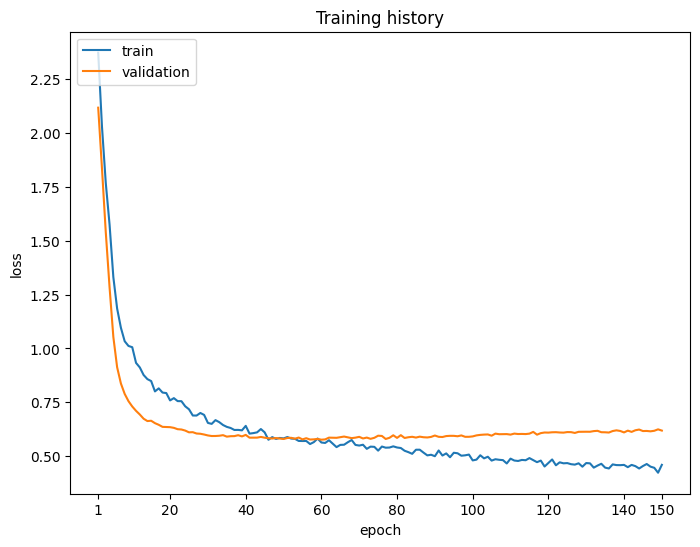

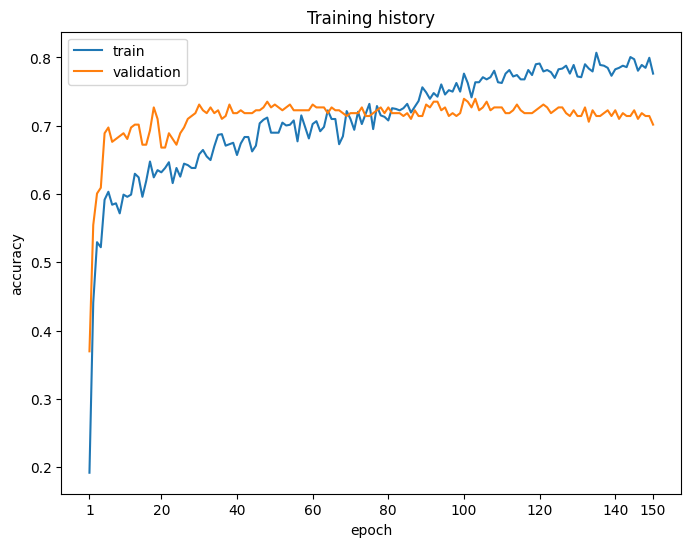

In [22]:
history = model.fit(x=X_train, y=y_train, epochs=150, batch_size=16, validation_split=0.2, verbose=2)
plot_history(history)

Evaluate Testdata using model

In [23]:
pred = model.predict(X_test)

evaluate_classification_result(y_test, pred, classes=nn_data["target_names"])


16/16 [==============================] - 0s 2ms/step
[[179  66]
 [ 95 169]]


Class inactive:
    Sensitivity (TPR):  73.061% (179 of 245)
    Specificity (TNR):  64.015% (169 of 264)
    Precision:          65.328% (179 of 274)
    Neg. pred. value:   71.915% (169 of 235)
Class active:
    Sensitivity (TPR):  64.015% (169 of 264)
    Specificity (TNR):  73.061% (179 of 245)
    Precision:          71.915% (169 of 235)
    Neg. pred. value:   65.328% (179 of 274)

Overall accuracy:   68.369% (348 of 509)
Balanced accuracy:  68.538%


array([[179,  66],
       [ 95, 169]])